## Customer Churn Prediction

In [120]:
# Importing the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.metrics import f1_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn import tree
import joblib
import warnings
warnings.filterwarnings('ignore')
print("Setup Complete")

Setup Complete


In [6]:
data = pd.read_csv('Churn_Modelling.csv')

In [7]:
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [8]:
data.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [10]:
#Dataset size
print(f"Number of rows in the dataset: {data.shape[0]}")
print(f"Number of columns in the dataset: {data.shape[1]}")

Number of rows in the dataset: 10000
Number of columns in the dataset: 14


In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [12]:
#Checking null values
data.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [13]:
#Summary Statistics
display(data.describe())

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [32]:
print(data['Geography'].unique())
print(data['Gender'].unique())
print(data['Geography'].value_counts())
print(data['Gender'].value_counts())

['France' 'Spain' 'Germany']
['Female' 'Male']
Geography
France     5014
Germany    2509
Spain      2477
Name: count, dtype: int64
Gender
Male      5457
Female    4543
Name: count, dtype: int64


In [50]:
#Converting categorical variables to numeric using get_dummies
x = data[['CreditScore']+['Geography']+['Gender']+['Age']+['Tenure']+['Balance']+['NumOfProducts']+['HasCrCard']+['IsActiveMember']+['EstimatedSalary']]
y = data['Exited']

x_dummies = pd.get_dummies(x,drop_first=True).astype(int)

### Exploratory Data Analysis

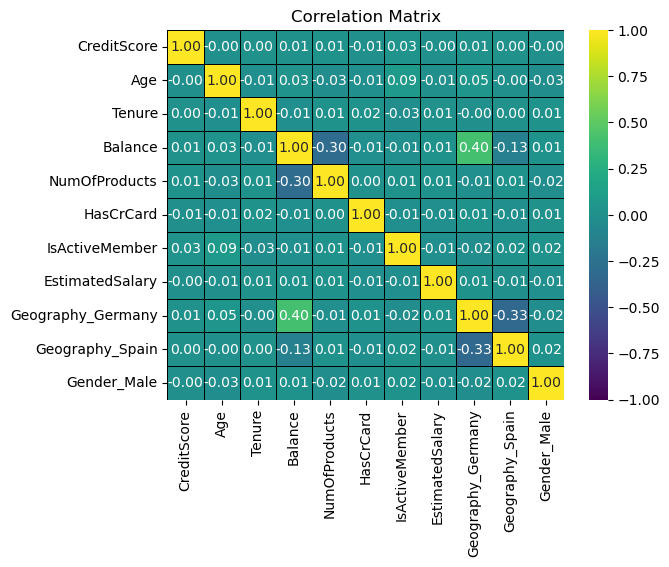

In [72]:
# Correlation Analysis
sns.heatmap(x_dummies.corr(),annot = True,cmap='viridis',vmin = -1,vmax = 1, fmt = '.2f',linewidths=0.5,linecolor='black')
plt.title('Correlation Matrix')
plt.show()

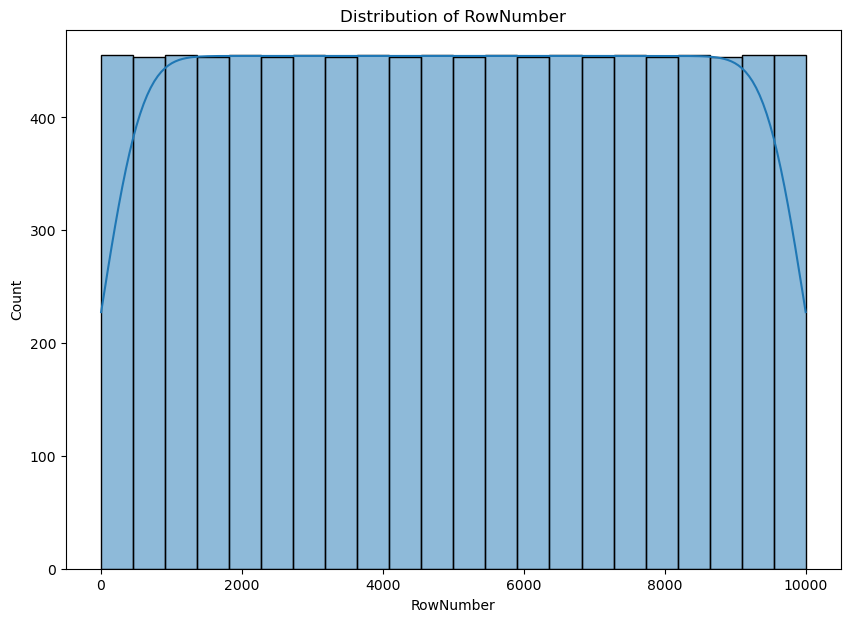

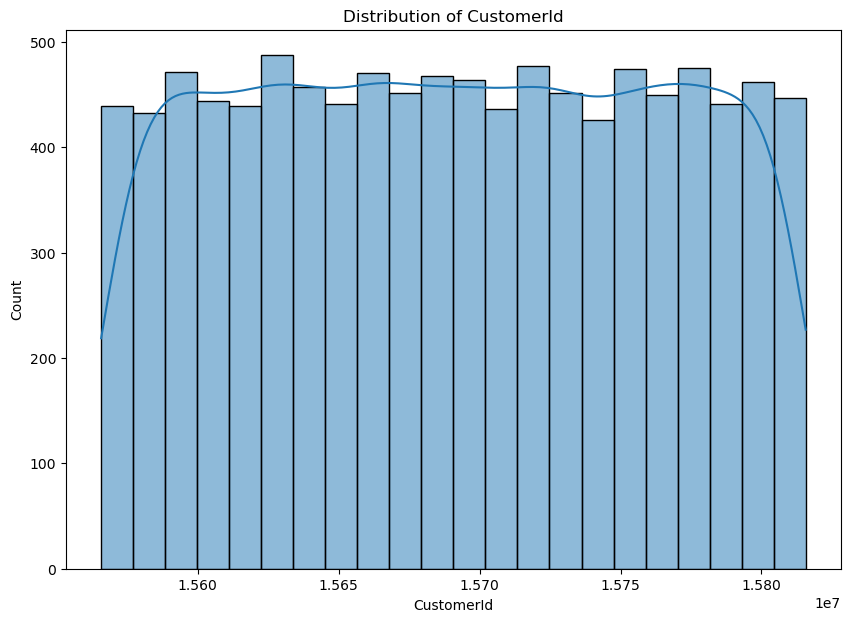

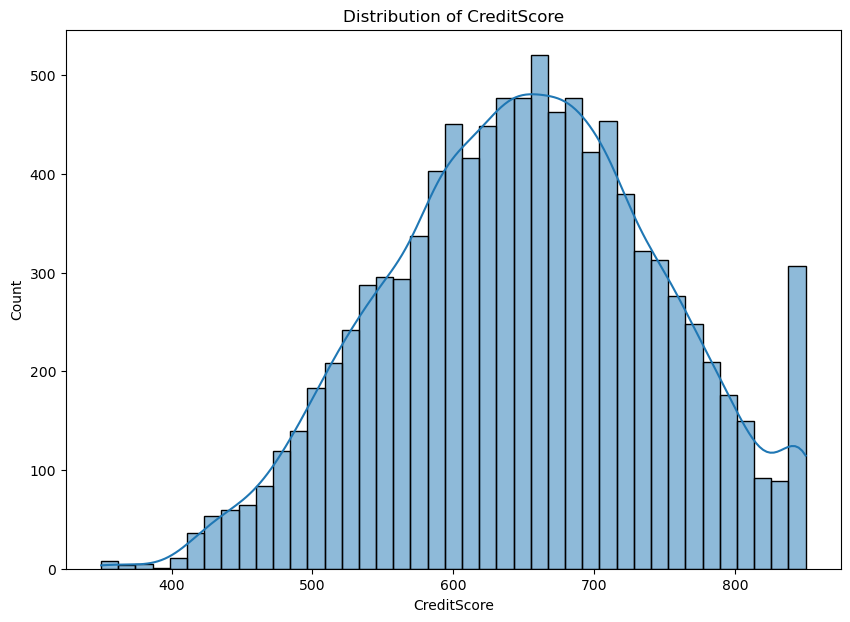

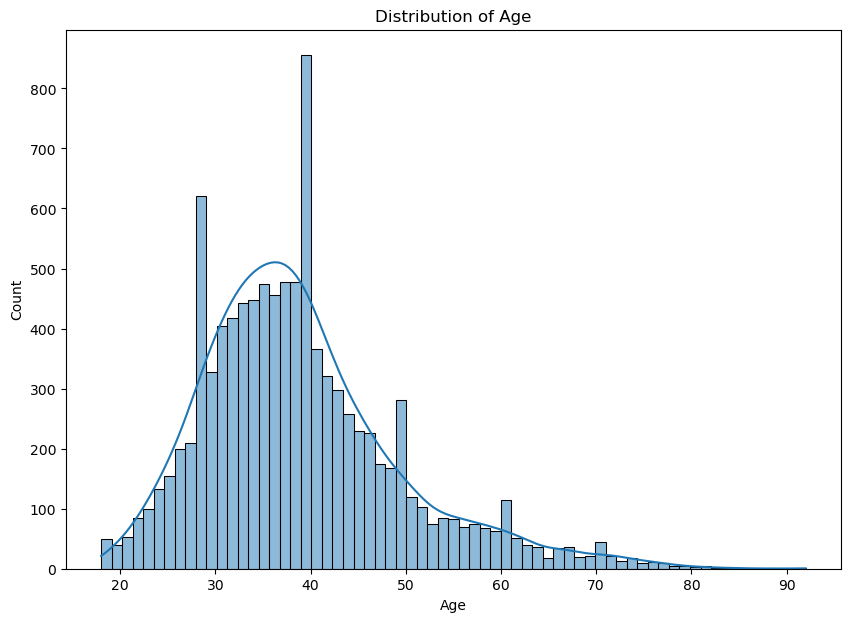

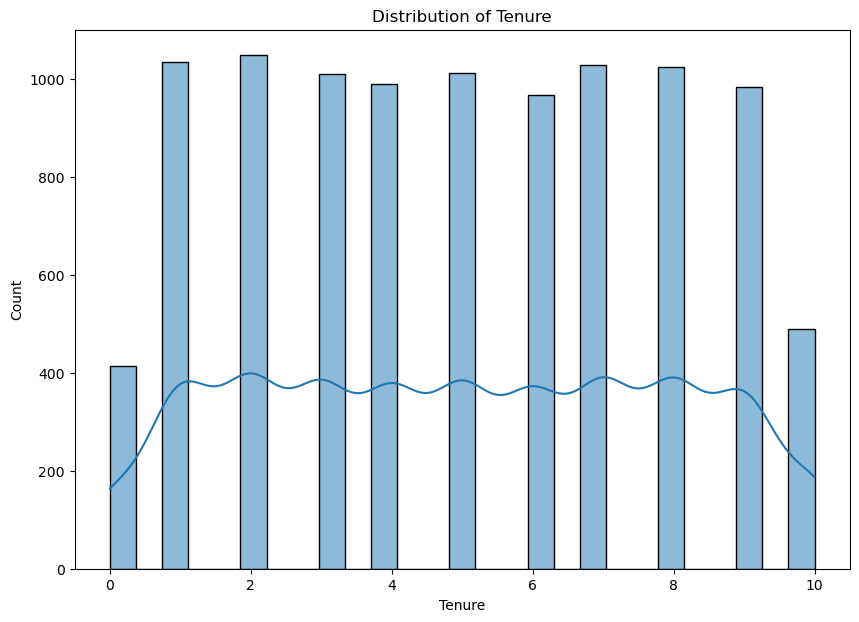

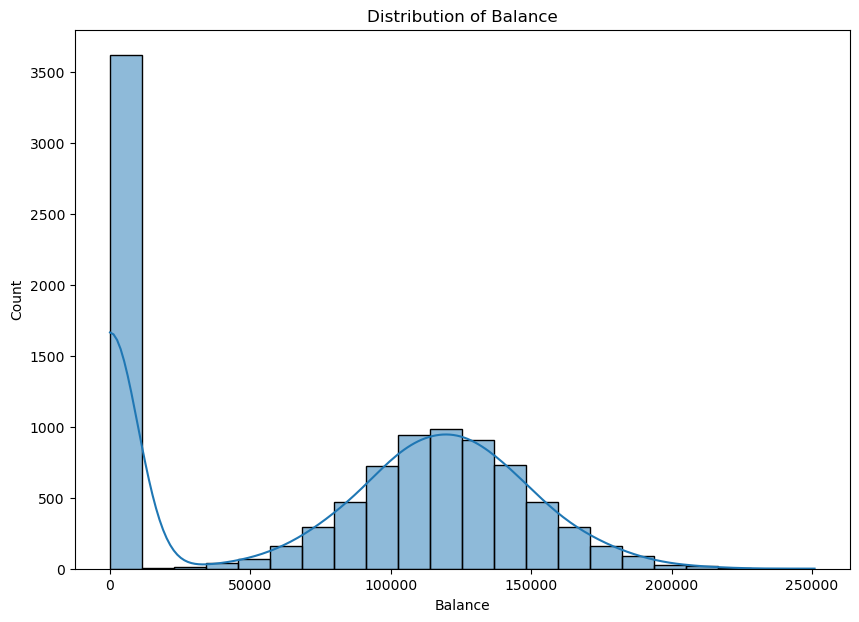

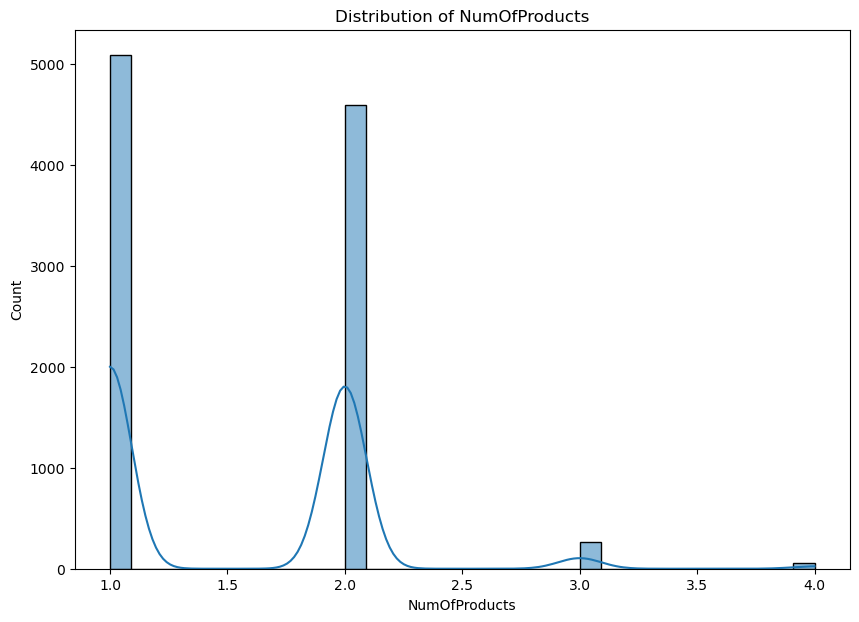

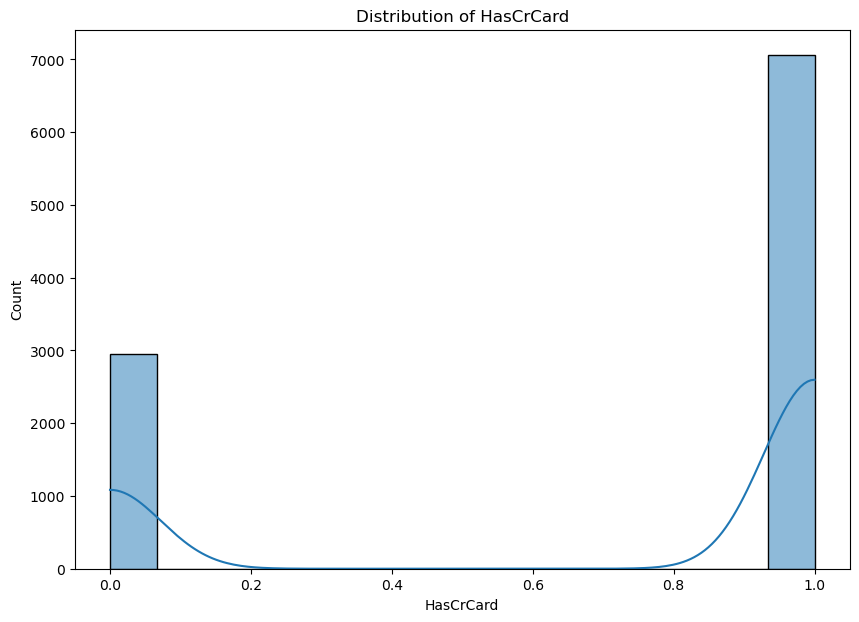

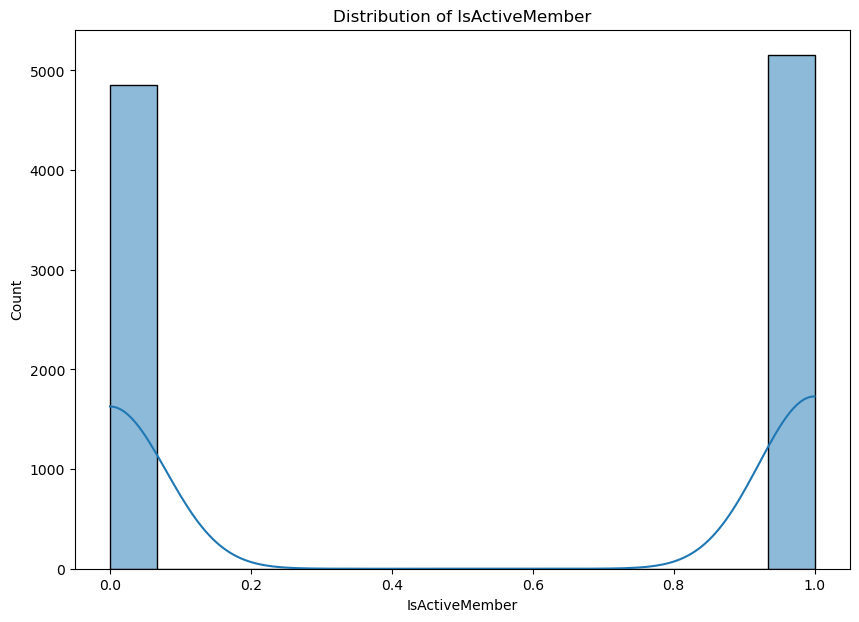

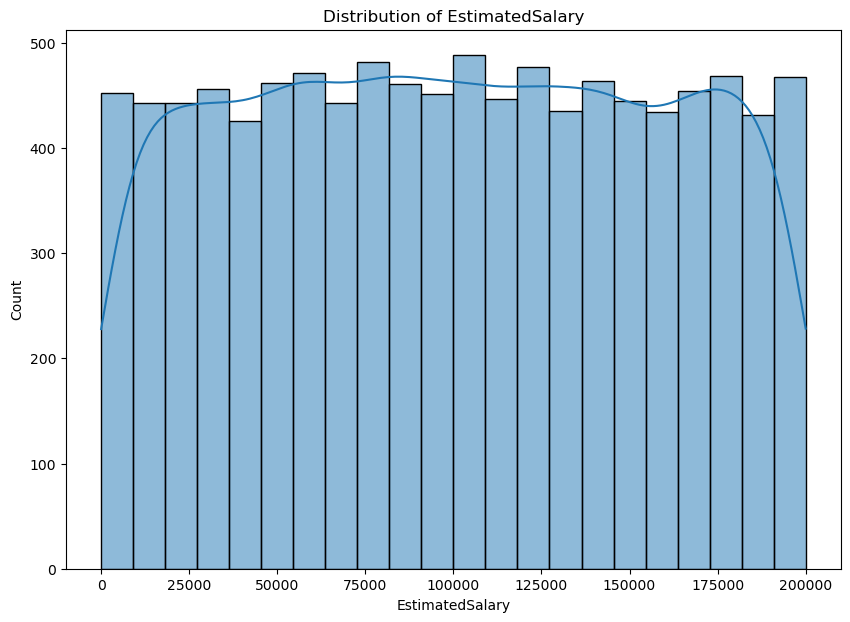

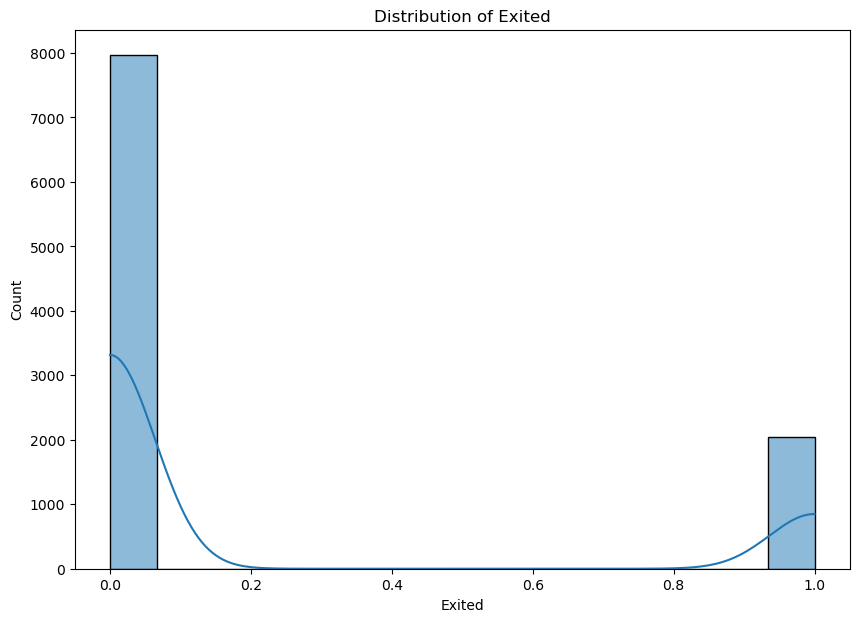

In [88]:
# Distribution of Numerical Features
numerical_features = data.select_dtypes(include=[np.number])
for column in numerical_features.columns:
    plt.figure(figsize=(10,7))
    sns.histplot(data[column], kde=True)
    plt.title(f'Distribution of {column}')
    plt.show()

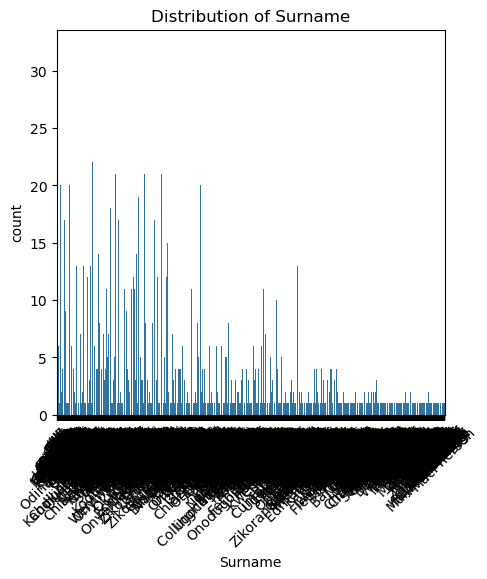

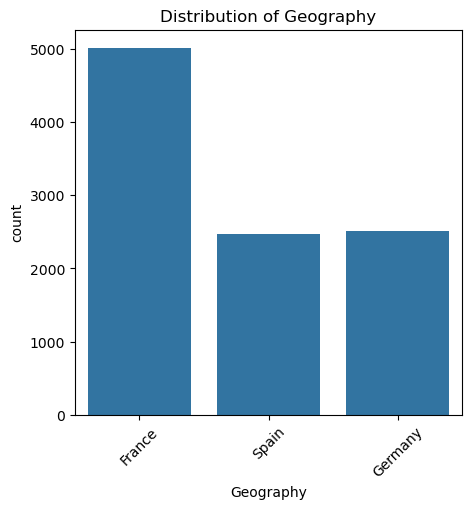

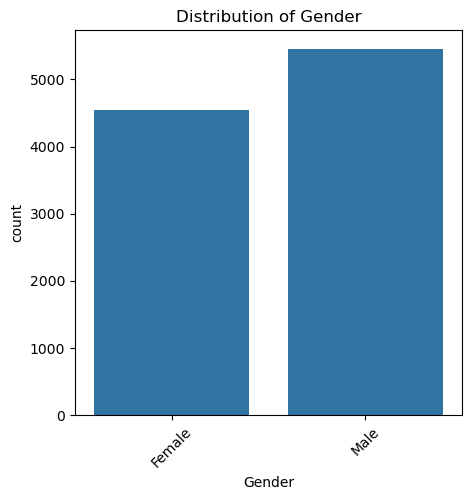

In [104]:
# Distribution of Categorical Features
categorical_features = data.select_dtypes(include=[object])
for column in categorical_features.columns:
    plt.figure(figsize=(5, 5))
    sns.countplot(x=data[column])
    plt.title(f'Distribution of {column}')
    plt.xticks(rotation=45)
    plt.show()

#### The independent and dependent(Target) variables in the dataset are:- 

#### Independent Variables :- CreditScore, Geography, Gender, Age, Tenure, Balance, NumOfProducts, HasCrCard, IsActiveMember, EstimatedSalary.
#### Dependent(Target) variable :- Exiteded

In [126]:
x_train,x_test,y_train,y_test = train_test_split(x_dummies,y,test_size = 0.2,random_state= 42,stratify = y)

x_train.shape,y_train.shape,x_test.shape,y_test.shape

((8000, 11), (8000,), (2000, 11), (2000,))

In [138]:
display(y_train.value_counts(normalize= True))

Exited
0    0.79625
1    0.20375
Name: proportion, dtype: float64

### Feature Engineering(Feature Scaling)

In [141]:
sc = StandardScaler()

In [143]:
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [145]:
# Stratified k fold cross validation
skf = StratifiedKFold(n_splits= 3)
count = 1
for train_index,test_index in skf.split(x_train,y_train):
    print(f'Fold:{count},Train set:{len(train_index)}, Test set:{len(test_index)}')
    count += 1

Fold:1,Train set:5333, Test set:2667
Fold:2,Train set:5333, Test set:2667
Fold:3,Train set:5334, Test set:2666


### Logistic Regression

In [148]:
reg = LogisticRegression()
reg.fit(x_train,y_train)

LogisticRegression()

In [150]:
y_pred1 = reg.predict(x_test)

In [152]:
print(f"F1 score: {f1_score(y_test,y_pred1)}")

F1 score: 0.2835820895522388


### Decision Tree Classifier Model

In [157]:
reg2 = DecisionTreeClassifier()
reg2.fit(x_train, y_train)

DecisionTreeClassifier()

In [159]:
y_pred2 = reg2.predict(x_test)

In [161]:
print(f"F1 Score is :- {f1_score(y_test, y_pred2)}")

F1 Score is :- 0.49406175771971494


### Here We can use DecisionTreeClassifier Model because f1 score is high as compared to the logistic regression. 

In [164]:
x_dummies = sc.fit_transform(x_dummies)

In [166]:
reg2.fit(x_dummies,y)


DecisionTreeClassifier()

In [168]:
# To save an object we you use the joblib.dump function.

joblib.dump(reg2, 'Churn_predict_model')

['Churn_predict_model']

In [170]:
# To load a previously saved object, we use the joblib.load function.

model = joblib.load('Churn_predict_model')

In [172]:
# Here We predict the customer will churn or not churn.

model.predict([["Credit_Score" == 619, "Geography" == ['France'],  "Gender" == ['Female'], "Age" == 42, "Tenure" == 2, "Balance" == 45122.22,
                "NumOfProducts" == 1, "HasCrCard" == 1, "IsActiveMember" == 1, "Estimated_Salary" == 101348.88, "Exited" == 1]])

array([0], dtype=int64)

#### This is the prediction of customer :- 0 Means the customer still in a  bank.